# Rolling Statistics

### (Another) General rule in Finance/Investing: Past performance is not an indicator of future performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format

In [4]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])
msft

,Price,Returns
Date,,
2014-10-01,45.9000,NaN
2014-10-02,45.7600,-0.0031
2014-10-03,46.0900,0.0072
2014-10-06,46.0900,0.0000
2014-10-07,45.5300,-0.0122
...,...,...
2021-05-24,250.7800,0.0229
2021-05-25,251.7200,0.0037
2021-05-26,251.4900,-0.0009


In [5]:
msft["log_return"] = np.log(msft.Price / msft.Price.shift()) # daily log returns (log of current price divided by the previous price)
msft

,Price,Returns,log_return
Date,,,
2014-10-01,45.9000,NaN,NaN
2014-10-02,45.7600,-0.0031,-0.0031
2014-10-03,46.0900,0.0072,0.0072
2014-10-06,46.0900,0.0000,0.0000
2014-10-07,45.5300,-0.0122,-0.0122
...,...,...,...
2021-05-24,250.7800,0.0229,0.0226
2021-05-25,251.7200,0.0037,0.0037
2021-05-26,251.4900,-0.0009,-0.0009


In [6]:
ann_mu = msft.log_return.mean() * 252 # annualised mean return
ann_mu

0.25466357960390723

In [7]:
ann_std = msft.log_return.std() * np.sqrt(252) # annualised std of returns
ann_std

0.27381663717464577

### Are Return and Risk constant over time? No, of course not! They change over time.

### Let's measure/quantify  this with rolling statistics

In [8]:
window = 252 # rolling window 252 trading years (~1 (calendar) year)

In [9]:
msft.log_return.rolling(window = 252)

Rolling [window=252,center=False,axis=0,method=single]

In [10]:
msft.log_return.rolling(window = 252).sum()

Date
2014-10-01      NaN
2014-10-02      NaN
2014-10-03      NaN
2014-10-06      NaN
2014-10-07      NaN
              ...  
2021-05-24   0.3123
2021-05-25   0.3267
2021-05-26   0.3244
2021-05-27   0.3180
2021-05-28   0.3093
Name: log_return, Length: 1677, dtype: float64

In [11]:
roll_mean = msft.log_return.rolling(window = 252).mean() * 252
roll_mean

Date
2014-10-01      NaN
2014-10-02      NaN
2014-10-03      NaN
2014-10-06      NaN
2014-10-07      NaN
              ...  
2021-05-24   0.3123
2021-05-25   0.3267
2021-05-26   0.3244
2021-05-27   0.3180
2021-05-28   0.3093
Name: log_return, Length: 1677, dtype: float64

In [13]:
roll_mean.iloc[252:]

Date
2015-10-01   -0.0285
2015-10-02   -0.0042
2015-10-05    0.0116
2015-10-06    0.0142
2015-10-07    0.0275
               ...  
2021-05-24    0.3123
2021-05-25    0.3267
2021-05-26    0.3244
2021-05-27    0.3180
2021-05-28    0.3093
Name: log_return, Length: 1425, dtype: float64

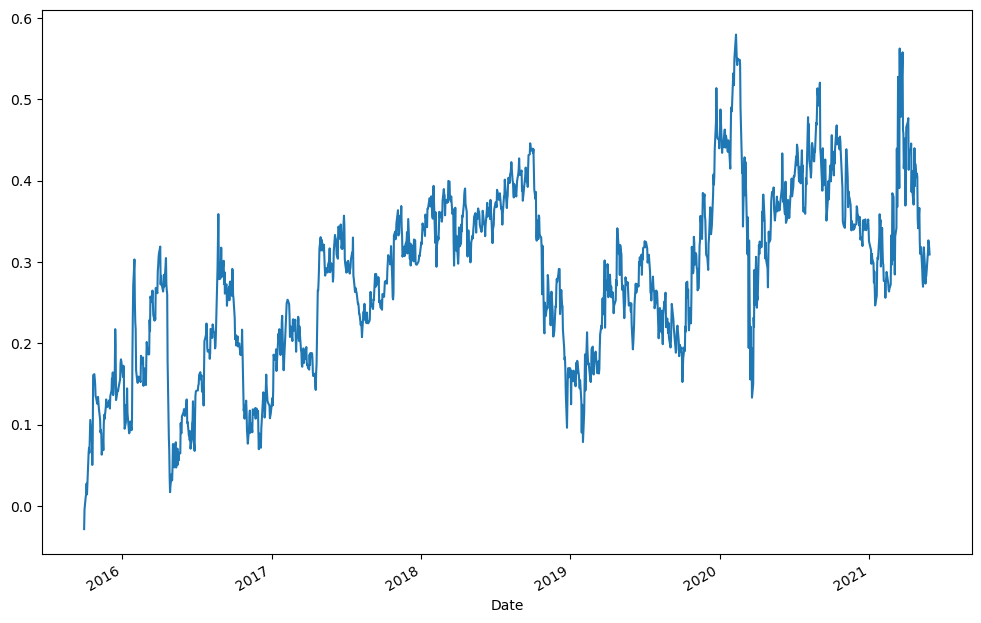

In [15]:
roll_mean.plot(figsize = (12, 8))
plt.show()

In [16]:
roll_std = msft.log_return.rolling(window = 252).std() * np.sqrt(252)
roll_std

Date
2014-10-01      NaN
2014-10-02      NaN
2014-10-03      NaN
2014-10-06      NaN
2014-10-07      NaN
              ...  
2021-05-24   0.2794
2021-05-25   0.2792
2021-05-26   0.2792
2021-05-27   0.2794
2021-05-28   0.2792
Name: log_return, Length: 1677, dtype: float64

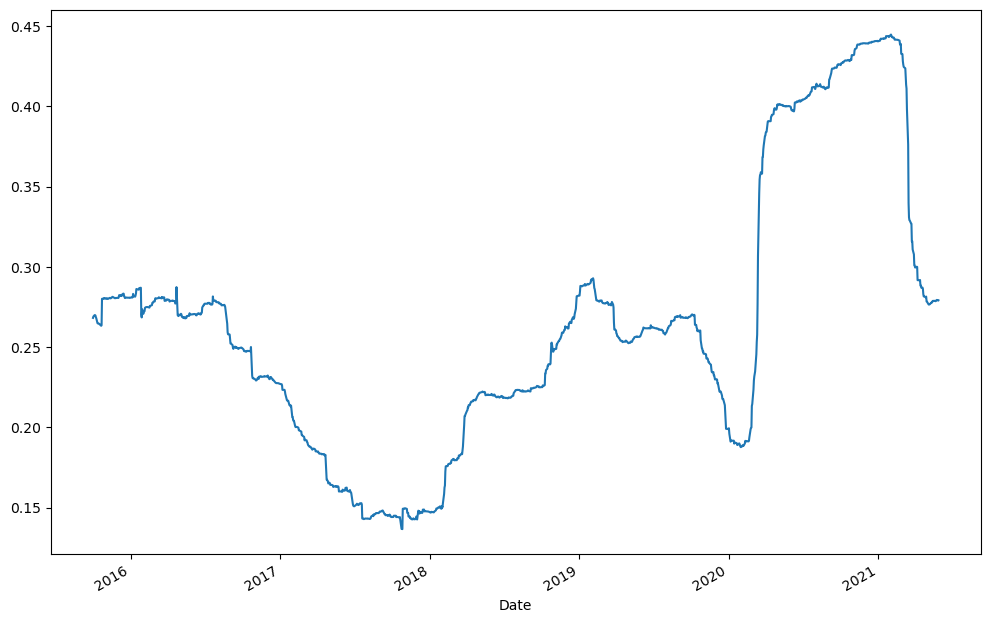

In [18]:
roll_std.plot(figsize = (12, 8))
plt.show()

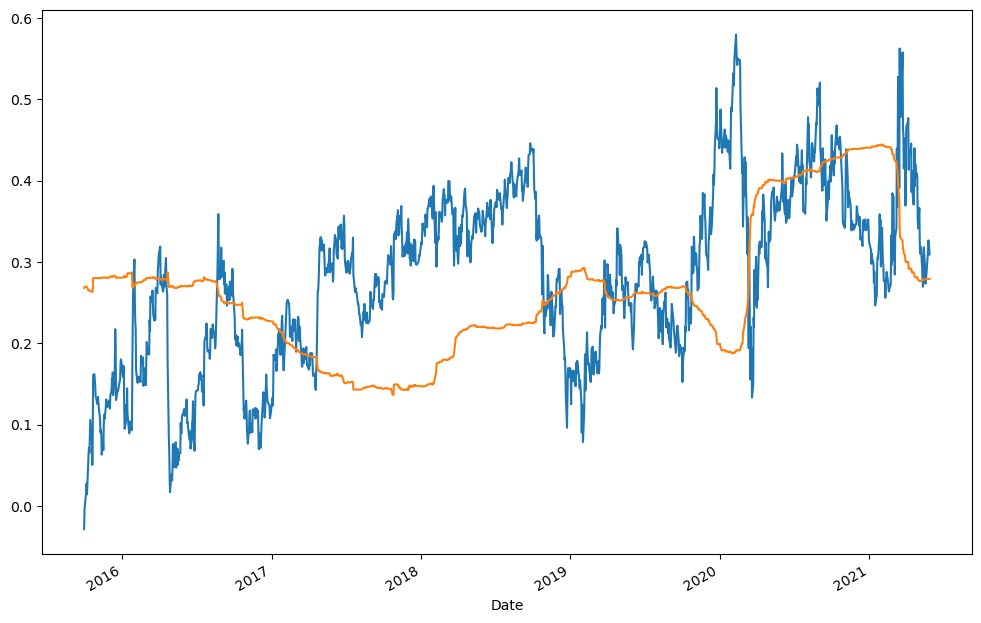

In [19]:
roll_mean.plot(figsize = (12, 8))
roll_std.plot(figsize = (12, 8))
plt.show()

**Take home**: be careful, you'll always find (sub)periods with low returns and high risk, and viceversa.

- analysis period must be sufficiently long enough to reduce impact of random noise.
- analysis period should be as short as possible and should only include the latest trends/regimes.
- commonly used reporting period: 3 years/36 months

In [20]:
### Another Example: Simple Moving Average (prices) - SMA

In [21]:
sma_window = 50

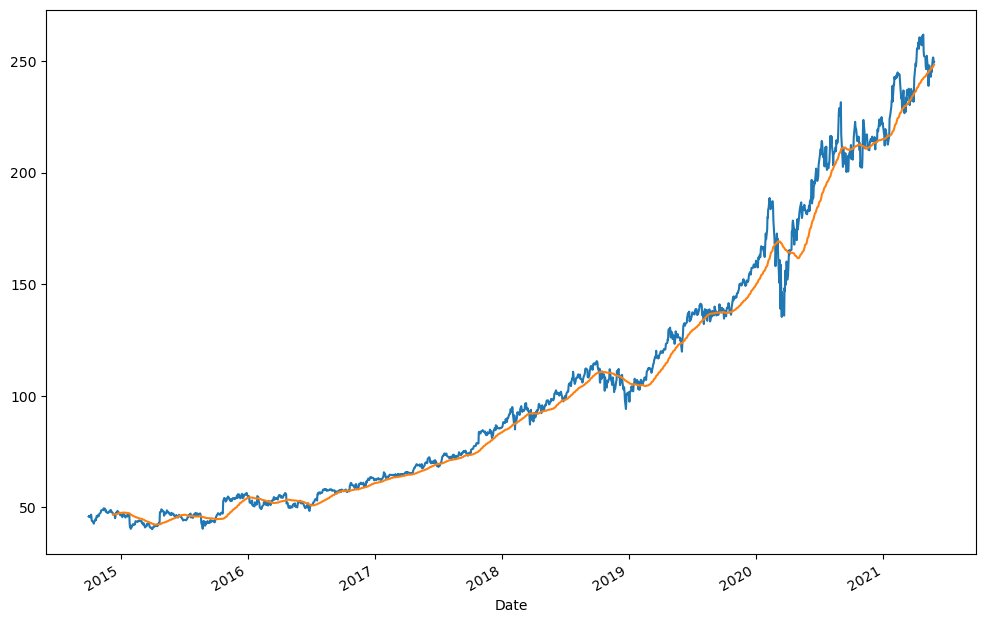

In [22]:
msft.Price.plot(figsize = (12, 8))
msft.Price.rolling(sma_window).mean().plot()
plt.show()